# Visualization Exercise Sheet

----------------------------------------------------------

In these short questions we will have you work with data from the GALAH spectroscopic survey (https://www.galah-survey.org) of stars in the Milky Way disk, and practice some visualization techniques to help analyze trends in the data.

You will find helpful documentation and examples to help you make the plots at the following graph galleries.
https://python-graph-gallery.com

https://matplotlib.org/stable/plot_types/index.html

**Download the data file 'galahamr.sav' located in the Moodle exercises page, which contains measurements of physical properties of ~7000 nearby stars.**

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd 
from scipy.stats import binned_statistic_2d

In [12]:
#Read in data set
from scipy.io import readsav
filepath = 'C:\\Users\\InesH\\Downloads\\galahamr.sav'  #change this to the path on your computer where the file is stored
stars = readsav(filepath)  

In [14]:
#Pull out some attributes of the stars we want to look at and store them in arrays
logg = stars['f']['logg']  #surface gravity   
teff = stars['f']['teff']  #effective temperature
mass = stars['f']['massmean']  #mass
lum = mass**4.  #luminosity for stars 0.43 < Msun < 2
age = stars['f']['agemean'] #age
feh = stars['f']['__fe_h_'] #[Fe/H], a logarithmic Iron abundance
afe = stars['f']['__alpha_fe_']  #[Alpha/Fe], logarithmic relative abundance of alpha elements(O, Si, etc.) relative to Iron


### 1) Consider one version of the Hertzsprung-Russell diagram using effective temperature and surface gravity of the stars ( $T_{eff}$, log(g) ).  Make two types of plots of the stars, with clearly labeled axes and colorbars where suitable: 
* a) a scatter plot with the points colored by age 
* b) a 2D density plot using, e.g. the **kde** package along with the **pcolormesh** routine in matplotlib; or hist2d within matplotlib

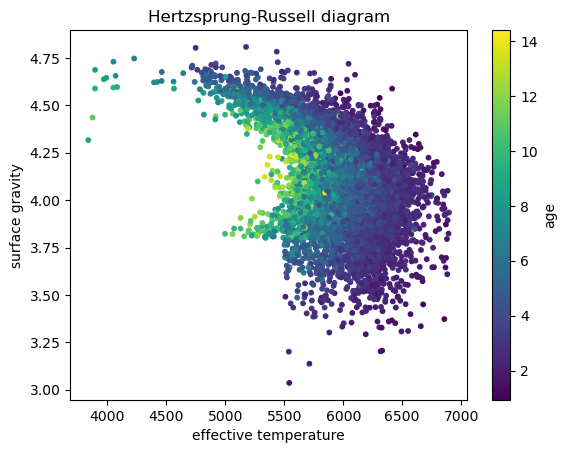

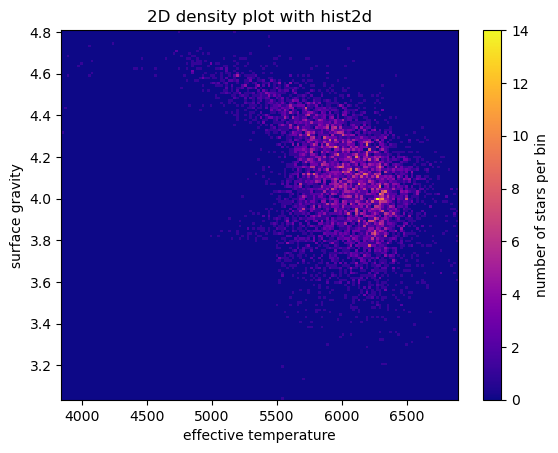

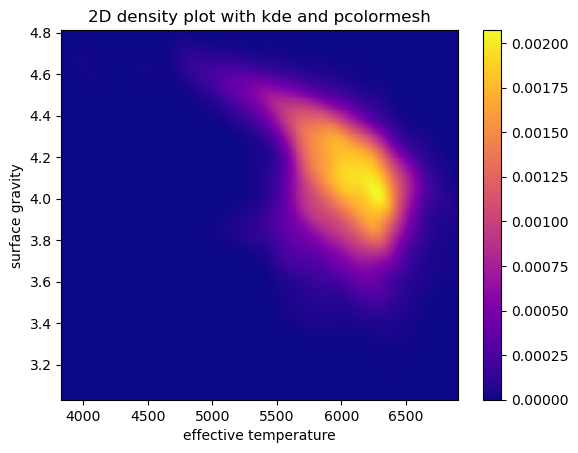

In [100]:
# scatter plot 
x = teff 
y = logg

scatter = plt.scatter (x, y, c = age, cmap = 'viridis', s = 10) # scatterplot with colorcoded age 
cbar = plt.colorbar(scatter)
cbar.set_label("age")

plt.title("Hertzsprung-Russell diagram")
plt.xlabel("effective temperature")
plt.ylabel("surface gravity")
plt.show()

# 2D density plot with hist2d 
plt.hist2d (x, y, bins = 150, cmap = 'plasma')
cbar = plt.colorbar()
cbar.set_label("number of stars per bin")

plt.xlabel("effective temperature")
plt.ylabel("surface gravity")
plt.title("2D density plot with hist2d")
plt.show()

# 2D density plot with kde and pcolormesh 
# calculate 2D-KDE 
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# grid 
xgrid = np.linspace(min(x), max(x), 200)
ygrid = np.linspace(min(y), max(y), 200)
A, B = np.meshgrid(xgrid, ygrid)
C = kde(np.vstack([A.ravel(), B.ravel()])).reshape(A.shape)

plt.pcolormesh(A, B, C, shading = 'auto', cmap = 'plasma')
cbar = plt.colorbar()

plt.xlabel("effective temperature")
plt.ylabel("surface gravity")
plt.title("2D density plot with kde and pcolormesh")
plt.show() 

### 2) Use a built-in, or hand-written routine to compute the running average of $T_{eff}$ as a function of $log(g)$.  Overplot this average approximation to the distribution of stars.  It should roughly subdivide the sample into cooler and hotter stars at a given value of $log(g)$.

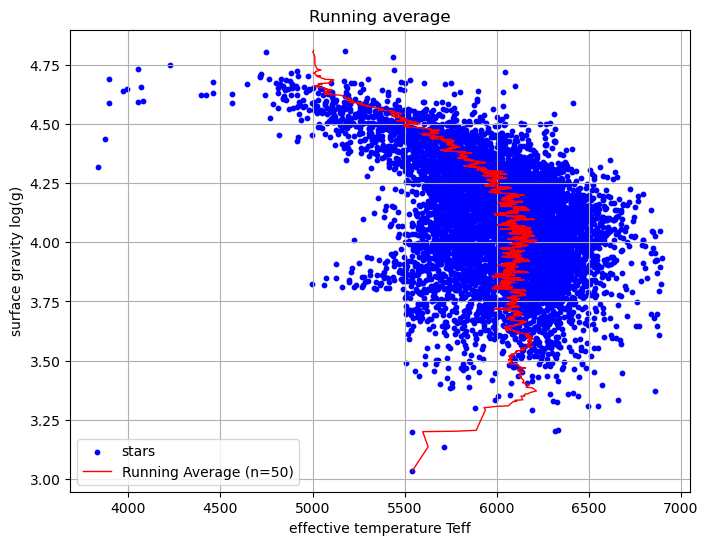

In [105]:
# correcting endian to be able to plot the data 
teff = np.array(stars['f']['teff']).byteswap().newbyteorder()
logg = np.array(stars['f']['logg']).byteswap().newbyteorder()

sort_idx = np.argsort(logg)
logg_sorted = logg[sort_idx]
teff_sorted = teff[sort_idx]

# calculate running average with pandas 
window = 50  # amount stars per window 
teff_running_avg = pd.Series(teff_sorted).rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(8,6))
plt.scatter(teff, logg, s=10, alpha=1, label="stars", c='blue')

plt.plot(teff_running_avg, logg_sorted, color='red', lw=1, label=f"Running Average (n={window})")

plt.xlabel("effective temperature Teff")
plt.ylabel("surface gravity log(g)")
plt.title("Running average")
plt.legend()
plt.grid(True)
plt.show()

### 3) [OPTIONAL]  Compute the mean and standard deviation ($\sigma$) of the ages of the cool and hot star sub-samples

* What percent of stars have an age that is within $1-\sigma$ of the mean ages of *both* the cool and hot star sub-samples?  e.g., the fraction of stars that have ages within
 
$(mean(age_{hot}) +\sigma(age_{hot}))$ $\leq age \leq$ $(mean(age_{cool}) -\sigma(age_{cool}))$

### 4) Create two versions of a *weighted* 2D density distribution of the sample of stars in the plane of **[Fe/H]** as a function of **age**:
* a) One where the density distribution is weighted by the mass of the stars
* b) One where the density distribution is weighted by the luminosity of the stars

Compute the weighted average metallicity and age for both cases and indicate them on the density distributions.

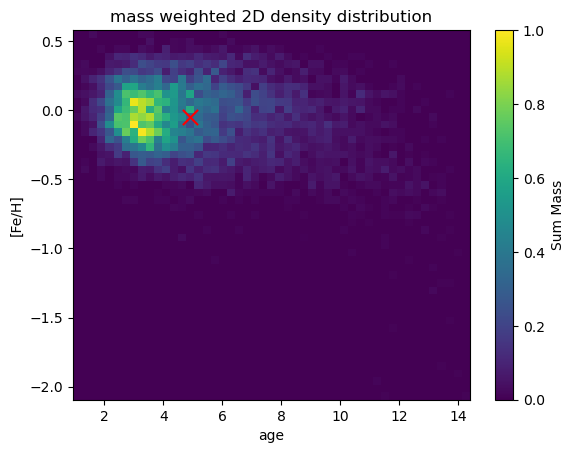

Mass-weighted averages:
 <Age>_mass = 4.889 Gyr
 <[Fe/H]>_mass = -0.048


In [103]:
# devide the space of age / [Fe/H] into bins 
bins_age = np.linspace(np.nanmin(age), np.nanmax(age), 50)
bins_feh = np.linspace(np.nanmin(feh), np.nanmax(feh), 50)

# Every bin contains sum of masses of stars 
H_mass, xedges, yedges, binnumber = binned_statistic_2d(
    age, feh, values=mass, statistic='sum', bins=[bins_age, bins_feh]
)

# mass weighted means 
mask_m = np.isfinite(age) & np.isfinite(feh) & np.isfinite(mass)
age_weighted_avg_m = np.average(age[mask_m], weights=mass[mask_m])
feh_weighted_avg_m = np.average(feh[mask_m], weights=mass[mask_m])

plt.pcolormesh(bins_age, bins_feh, H_mass.T, shading='auto', cmap='viridis')
plt.scatter(age_weighted_avg_m, feh_weighted_avg_m, color='red', marker='x', s=120, label='Mass-weighted mean')
plt.title("mass weighted 2D density distribution")
plt.xlabel("age")
plt.ylabel("[Fe/H]")
plt.colorbar(label="Sum Mass")

plt.show() 

# calculate mass weighted averages: 
print("Mass-weighted averages:")
print(f" <Age>_mass = {age_weighted_avg_m:.3f} Gyr")
print(f" <[Fe/H]>_mass = {feh_weighted_avg_m:.3f}")

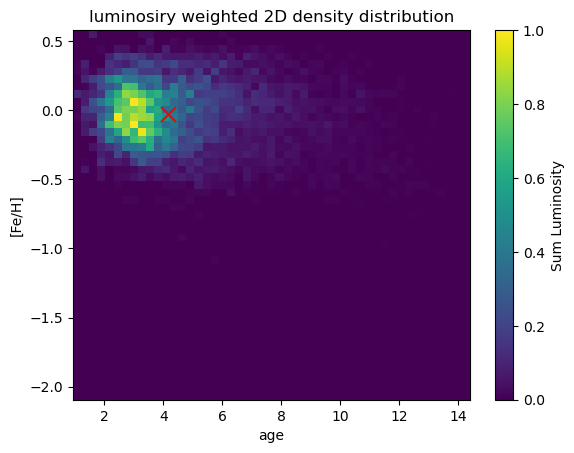


Luminosity-weighted averages:
  <Age>_lum = 4.145 Gyr
  <[Fe/H]>_lum = -0.026


In [101]:
# every bin contains sum of kuminosities of stars 
H_lum, xedges, yedges, binnumber = binned_statistic_2d(
    age, feh, values=lum, statistic='sum', bins=[bins_age, bins_feh]
)

# luminosity weighted means 
mask_l = np.isfinite(age) & np.isfinite(feh) & np.isfinite(lum)
age_weighted_avg_l = np.average(age[mask_l], weights=lum[mask_l])
feh_weighted_avg_l = np.average(feh[mask_l], weights=lum[mask_l]) 

plt.pcolormesh(bins_age, bins_feh, H_lum.T, shading = 'auto', cmap='viridis')
plt.scatter(age_weighted_avg_l, feh_weighted_avg_l, color='red', marker='x', s=120, label='Mass-weighted mean')
plt.title("luminosiry weighted 2D density distribution")
plt.xlabel("age")
plt.ylabel("[Fe/H]") 
plt.colorbar(label="Sum Luminosity")

plt.show() 

# calculate luminosity weighted averages: 
print("\nLuminosity-weighted averages:")
print(f"  <Age>_lum = {age_weighted_avg_l:.3f} Gyr")
print(f"  <[Fe/H]>_lum = {feh_weighted_avg_l:.3f}")